In [1]:
import scipy.io 
import io as sio 
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from random import sample
from scipy.stats import entropy
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [9]:
def active_learning(train_data,test_data,unlabeled_data): #here we defined active learning (parameters which we need)
    train_acc = [] #empty list
    test_acc = [] #empty list 
    iterations = 0 #while loop it must be in loop, 50 accuracy values to end that <50 it is starting from 0 so iteration=0
    k=10
    while (iterations<50): 
        #print('filename:',filename)
        print('Iteration Number:',iterations)
        X_train, y_train = train_test_split(train_data, 
                      test_size=0.5) #to train model we have taken x&y as training data it will be divided into 50%
        X_test, y_test = train_test_split(test_data, 
                      test_size=0.5) #this is for test 
        X_unlabeled, y_unlabeled = train_test_split(unlabeled_data, 
                       test_size=0.5)#unlabeled 
       #train
        classifer_model = LogisticRegression(max_iter=1000) #importing LR from formula (just importing LR model)
        classifer_model.fit(X_train, y_train) #fitting the model 

       #test
        X_predict = classifer_model.predict(X_test) #we are tesing the model that we created 
        y_predict = classifer_model.predict(y_test)
        test_score = accuracy_score(y_test, y_predict) #predicted score 
        test_acc.append(test_score) #now we are  appending score into test accuarcy list 
        print('Accuracy:',test_score) 
   
      #prediction on unlabled data
        pred_probs = classifer_model.predict_proba(X_unlabeled) #samething on unlabled 
        preds = classifer_model.predict(X_unlabeled) 
    
      #Randomsample
        df_predictedrf= pd.DataFrame({"predicted_values": preds}) #we are creating dataframe from the above predicted values 
        df_predictedrf.index = X_unlabeled.index #just assigning index values of unlabeled values to  newly created dataframe
        Random_sample_pred_values = df_predictedrf['predicted_values'].sample(k) #we are taking random 10 samples
        rspreds = list(Random_sample_pred_values) #we are converting randomsample values into list 
        rstrain = list(train_data['trainingLabels']) # same as for training labels 
        columns = rstrain+rspreds #concatinating the two lists 
        train_data = pd.DataFrame({'trainingLabels': columns}) #creating a new traindata by adding predicted values 
        X_unlabeled = X_unlabeled.drop(index=Random_sample_pred_values.index) #droping unlabled values that are predicted the previous values 
        print(f"{len(Random_sample_pred_values)} Required Random samples data added to training data.")
        print(f"{len(Random_sample_pred_values)} are dropped from the unlabeled dataset using random-forest.")
    
      #entropy
        Uncertainty_pred_values = entropy(pred_probs) 
        value = Uncertainty_pred_values.argmax() #taking max values 
        print("highest entropy value", value)
        if (value % 2) == 0:   #to make 50% dividing the data equally 
            value_k= value
        else:  
            value_k = value+1 # to make it even I am using -1
        entropy_pred_values = df_predictedrf['predicted_values'].sample(value_k) #if we get entropy value as 5 then it will add 5 
        entropy_values= list(entropy_pred_values)
        print("Selected entropy samples", entropy_values)
        entropypreds = list(entropy_pred_values)
        entropytrain = list(train_data['trainingLabels'])
        column = entropytrain+entropypreds #old train data and new train data
        train_data = pd.DataFrame({'trainingLabels': column}) 
        X_unlabeled = X_unlabeled.drop(index=entropy_pred_values.index) #we are droping the predicted values
        print(f"{len(entropy_pred_values)} Required Uncertainty-based samples data added to training data.")
        print(f"{len(entropy_pred_values)} are dropped from the unlabeled dataset using Uncertainty-based samples.")
        iterations += 1 
    return iterations,test_acc
     

In [10]:
path = r"/Users/malliksiddarth/Desktop/FSU/Codes/Data Mining /Assignment 3/Data for Assignment 3/MindReading"
path2 = str(Path(path))+'/' #'/'-> to get into floder 
test_data=[] #empty list
train_data=[]
unlabeled_data=[]
#for loop 
for i in os.listdir(path): #to acess the path (dataset) 
    if os.path.isfile(os.path.join(path,i)) and 'testingLabels' in i: #to get test labels dataset.
        mat = scipy.io.loadmat(path2 +i) #we are converting .mat into pandas 
        mat = {k:v for k, v in mat.items() if k[0] != '_'} #we are now assigning this converted data as a test_data in empty list
        test_data.append(pd.DataFrame({k: np.array(v).flatten() for k, v in mat.items()})) #testdata append is basically inserting
    elif os.path.isfile(os.path.join(path,i)) and 'trainingLabels' in i:
        filename=i
        mat = scipy.io.loadmat(path2 +i)
        mat = {k:v for k, v in mat.items() if k[0] != '_'}
        train_data.append(pd.DataFrame({k: np.array(v).flatten() for k, v in mat.items()})) #traindata
    elif os.path.isfile(os.path.join(path,i)) and 'unlabeledMatrix' in i:
        mat = scipy.io.loadmat(path2 +i)
        mat = {k:v for k, v in mat.items() if k[0] != '_'}
        unlabeled_data.append(pd.DataFrame({k: np.array(v).flatten() for k, v in mat.items()})) #unlabeleddata


Iteration Number: 0
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [6, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 1
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [6, 1, 6, 2]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 2
Accuracy: 0.14417989417989419
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 a

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 4
Accuracy: 0.14417989417989419
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 4, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 5
Accuracy: 0.164021164021164
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training d

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Selected entropy samples [3, 3]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 8
Accuracy: 0.15608465608465608
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 1
Selected entropy samples [6, 3]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 9
Accuracy: 0.167989417989418
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 10
Accuracy: 0.164021164021164
10 Required Random samples data added t

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 1, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 12
Accuracy: 0.15476190476190477
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [6, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 13
Accuracy: 0.15608465608465608
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 2
Selected entropy samples [6, 6]
2 Required Uncertainty-based samples data added to training data.
2 are dro

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 1, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 16
Accuracy: 0.15608465608465608
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 1
Selected entropy samples [6, 6]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 17
Accuracy: 0.1574074074074074
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [3, 6, 6, 6, 6, 3]
6 Required Uncertainty-based samples data added to training data.
6 ar

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 20
Accuracy: 0.1626984126984127
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 21
Accuracy: 0.164021164021164
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 1
Selected entropy samples [6, 6]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 22
Accuracy: 0.17063492063492064


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 24
Accuracy: 0.1574074074074074
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 3, 6, 6, 6, 3]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 25
Accuracy: 0.16534391534391535
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [2, 6, 2, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 26
Accuracy: 0.17857142857142858
10 Required Random samples data added to training data.
10 a

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 28
Accuracy: 0.15476190476190477
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 1
Selected entropy samples [3, 6]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 29
Accuracy: 0.15079365079365079
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 2
Selected entropy samples [6, 6]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 30
Accuracy: 0.16005291005291006
10 Requir

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.16666666666666666
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 1
Selected entropy samples [6, 6]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 32
Accuracy: 0.16666666666666666
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 1, 6, 6, 6, 1]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 33
Accuracy: 0.14947089947089948
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples da

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.15211640211640212
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [6, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 36
Accuracy: 0.164021164021164
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 37
Accuracy: 0.167989417989418
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 1
Selected entropy samples [6, 6]
2 Required Uncertainty-based samples data added t

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 43
Accuracy: 0.14947089947089948
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 44
Accuracy: 0.15343915343915343
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to traini

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 46
Accuracy: 0.15343915343915343
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 5, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 47
Accuracy: 0.1574074074074074
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the u

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 49
Accuracy: 0.16137566137566137
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 4, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 0
Accuracy: 0.17857142857142858
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 2
Selected entropy samples [1, 4]
2 Required Uncertainty-based samples data added to training data.
2 ar

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.167989417989418
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [5, 5, 5, 5]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 3
Accuracy: 0.17989417989417988
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 3, 4, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 4
Accuracy: 0.17724867724867724
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [5, 5, 4, 4, 5, 5]
6 Required Uncertainty-based samples data a

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 7
Accuracy: 0.1917989417989418
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 8
Accuracy: 0.18386243386243387
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 9
Accuracy: 0.17857142857142858
10 Required Random samples data added to training data.
10 are dropped from the unlabeled

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.1746031746031746
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [4, 4, 4, 1]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 12
Accuracy: 0.17328042328042328
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 4, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 13
Accuracy: 0.16005291005291006
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 4, 4]
4 Required Uncertainty-based samples data adde

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.17195767195767195
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 17
Accuracy: 0.18253968253968253
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 2
Selected entropy samples [4, 5]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 18
Accuracy: 0.1626984126984127
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [4, 4, 2, 2, 4, 2]
6 Required Uncertainty-based samples data added to train

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 4, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 21
Accuracy: 0.17195767195767195
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [4, 5, 4, 4, 4, 4]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 22
Accuracy: 0.16005291005291006
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 1
Selected entropy samples [1, 4]
2 Required Uncertainty-based samples data added to training data.
2 are dro

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.164021164021164
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 1
Selected entropy samples [4, 4]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 26
Accuracy: 0.17592592592592593
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [6, 4, 4, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 27
Accuracy: 0.19444444444444445
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 4, 4]
4 Required Uncertainty-based samples data added to tr

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.17592592592592593
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 2, 3]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 31
Accuracy: 0.17328042328042328
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [4, 4, 4, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 32
Accuracy: 0.19047619047619047
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 3, 4]
4 Required Uncertainty-based samples data add

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.1626984126984127
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 3, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 39
Accuracy: 0.16666666666666666
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 4, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 40
Accuracy: 0.17857142857142858
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 4, 4]
4 Required Uncertainty-based samples data adde

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.17195767195767195
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [2, 4, 4, 4, 4, 3]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 43
Accuracy: 0.17063492063492064
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 5, 3]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 44
Accuracy: 0.18518518518518517
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 4, 5]
4 Required Uncertainty-based samples da

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [4, 4, 4, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 47
Accuracy: 0.17857142857142858
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [4, 4, 4, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 48
Accuracy: 0.17195767195767195
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 are dropped from 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [5, 4, 5, 4]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 1
Accuracy: 0.14947089947089948
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 2
Accuracy: 0.376984126984127
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 are dropped from 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.13095238095238096
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [6, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 5
Accuracy: 0.13227513227513227
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [2, 2, 2, 1, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 6
Accuracy: 0.15343915343915343
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based sample

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.14947089947089948
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [3, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 9
Accuracy: 0.1388888888888889
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 10
Accuracy: 0.1349206349206349
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 2
Selected entropy samples [6, 1]
2 Required Uncertainty-based samples data added 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [6, 3, 6, 3]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 13
Accuracy: 0.1455026455026455
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [6, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 14
Accuracy: 0.1455026455026455
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [6, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 17
Accuracy: 0.13095238095238096
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 1
Selected entropy samples [6, 6]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 18
Accuracy: 0.14417989417989419
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [6, 4, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped f

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.13227513227513227
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 0
Selected entropy samples []
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 21
Accuracy: 0.13624338624338625
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 2
Selected entropy samples [4, 4]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 22
Accuracy: 0.14153439153439154
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [6, 2, 6, 6]
4 Required Uncertainty-based samples data added to training d

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

highest entropy value 5
Selected entropy samples [6, 6, 6, 4, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 24
Accuracy: 0.1402116402116402
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 4, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 25
Accuracy: 0.14417989417989419
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 4
Selected entropy samples [6, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 26
Accuracy: 0.1269841269

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.1283068783068783
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 2
Selected entropy samples [6, 6]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 29
Accuracy: 0.15211640211640212
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 30
Accuracy: 0.14682539682539683
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples dat

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 33
Accuracy: 0.1335978835978836
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 34
Accuracy: 0.14285714285714285
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [6, 2, 6, 2]
4 Required Uncertainty-based samples data added to training data

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.14417989417989419
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 2
Selected entropy samples [6, 6]
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 37
Accuracy: 0.14285714285714285
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 38
Accuracy: 0.14682539682539683
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples da

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [6, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 40
Accuracy: 0.13624338624338625
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 2, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 41
Accuracy: 0.1574074074074074
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 4, 6, 6]
6 Required Uncertainty-based samples data added to training data

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.14285714285714285
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based samples data added to training data.
6 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 44
Accuracy: 0.13624338624338625
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 3
Selected entropy samples [1, 6, 6, 6]
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 45
Accuracy: 0.1388888888888889
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
highest entropy value 5
Selected entropy samples [6, 6, 6, 6, 6, 6]
6 Required Uncertainty-based sampl

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


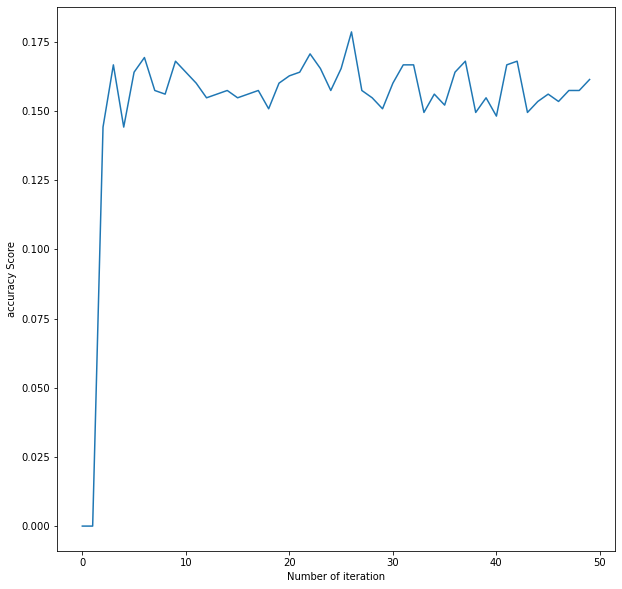

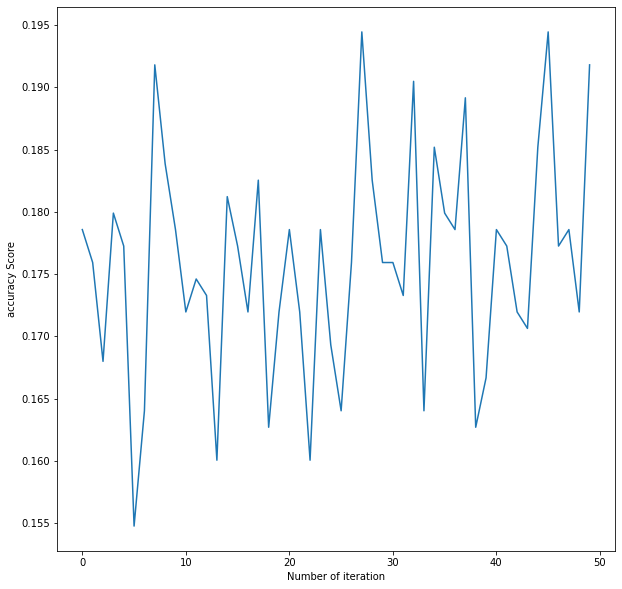

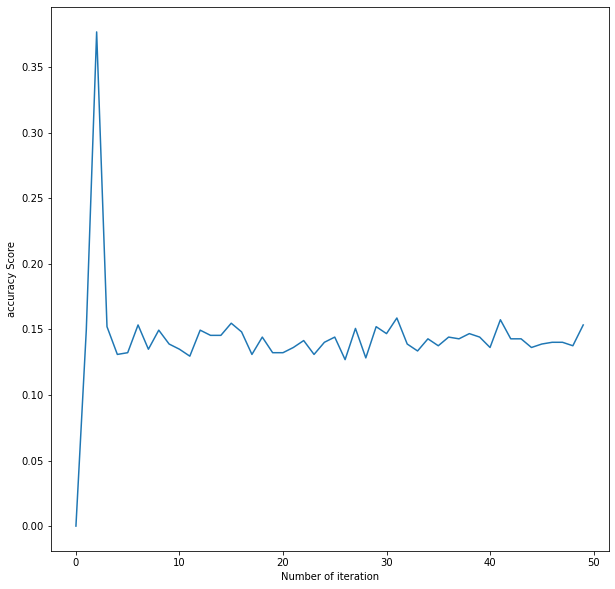

In [11]:
for test,train,unlabeled in zip(test_data,train_data,unlabeled_data): #everything is in order train,test,unlabeled 
    iteration,test_acc = active_learning(train,test,unlabeled) # we are sending that zip into active learning function 
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    ax1.plot(range(iteration), test_acc)
    ax1.set_ylabel('accuracy Score')
    ax1.set_xlabel('Number of iteration')

In [5]:
#Dataset MMI

In [6]:
path = r"/Users/malliksiddarth/Desktop/FSU/Codes/Data Mining /Assignment 3/Data for Assignment 3/MMI"
path2 = str(Path(path))+'/' #'/'-> to get into floder 
test_data1=[]
train_data1=[]
unlabeled_data1=[]
#for loop 
for i in os.listdir(path): #path ni acess chesidni 
    if os.path.isfile(os.path.join(path,i)) and 'testingLabels' in i: #to get test labels dataset.
        mat = scipy.io.loadmat(path2 +i) #mat ni pandas ki convert 
        mat = {k:v for k, v in mat.items() if k[0] != '_'} #converted data ni test_data is empty list aa empty list lo convert pd data set ni load chesamu 
        test_data1.append(pd.DataFrame({k: np.array(v).flatten() for k, v in mat.items()})) #testdata append is basic ga insert 
    elif os.path.isfile(os.path.join(path,i)) and 'trainingLabels' in i:
        filename=i
        mat = scipy.io.loadmat(path2 +i)
        mat = {k:v for k, v in mat.items() if k[0] != '_'}
        train_data1.append(pd.DataFrame({k: np.array(v).flatten() for k, v in mat.items()})) #traindata
    elif os.path.isfile(os.path.join(path,i)) and 'unlabeledMatrix' in i:
        mat = scipy.io.loadmat(path2 +i)
        mat = {k:v for k, v in mat.items() if k[0] != '_'}
        unlabeled_data1.append(pd.DataFrame({k: np.array(v).flatten() for k, v in mat.items()})) #unlabeleddata



In [7]:
def active_learning(train_data1,test_data1,unlabeled_data1): #active learning ni define chesthunam (manaki kavalsina parameters)
    train_acc1 = [] #empty list
    test_acc1 = [] #empty list 
    iterations1 = 0 #while loop it must be in loop 50 accuracy values to end that <50 it is starting from 0 so iteration=0
    k=10
    while (iterations1<50): 
        #print('filename:',filename)
        print('Iteration Number:',iterations1)
        X_train, y_train = train_test_split(train_data1, 
                      test_size=0.5) #to train model we have taken x&y as training data it will be divided 50%
        X_test, y_test = train_test_split(test_data1, 
                      test_size=0.5) #this for test 
        X_unlabeled1, y_unlabeled1 = train_test_split(unlabeled_data1, 
                       test_size=0.5)#unlabeled 
       #train
        classifer_model = LogisticRegression(max_iter=1000) #importing LR from formula 
        classifer_model.fit(X_train, y_train) #model ni fit chesthunam 

       #test
        X_predict1 = classifer_model.predict(X_test) #chesina model ni test chesthunam predicting 
        y_predict1 = classifer_model.predict(y_test)
        test_score = accuracy_score(y_test, y_predict1) #predict chesina score 
        test_acc1.append(test_score) #vachina score appending into test accuarcy list 
        print('Accuracy:',test_score) 
   
      #prediction on unlabled data
        pred_probs1 = classifer_model.predict_proba(X_unlabeled1) #samething on unlabled 
        preds1 = classifer_model.predict(X_unlabeled1) 
    
      #Randomsample
        df1_predictedrf= pd.DataFrame({"predicted_values": preds1}) #we are creating dataframe from the above predicted values 
        df1_predictedrf.index = X_unlabeled1.index #just assigning index values of unlabeled values to  newly created dataframe
        Random_sample_pred_values1 = df1_predictedrf['predicted_values'].sample(k) #we are taking random 10 samples
        rspreds1 = list(Random_sample_pred_values1) #randomsample values ni list ki convert chesthunam
        rstrain1 = list(train_data1['trainingLabels']) #training labels ni list ki change chesthuna 
        columns = rstrain1+rspreds1 #concatinating the two lists 
        train_data1 = pd.DataFrame({'trainingLabels': columns}) #creating a new traindata by adding predicted values 
        X_unlabeled1 = X_unlabeled1.drop(index=Random_sample_pred_values1.index) #droping unlabled values that are predicted ante vachina old data
        print(f"{len(Random_sample_pred_values1)} Required Random samples data added to training data.")
        print(f"{len(Random_sample_pred_values1)} are dropped from the unlabeled dataset using random-forest.")
    
      #entropy 
        Uncertainty_pred_values1 = entropy(pred_probs1) 
        value = Uncertainty_pred_values1.argmax() #taking max values 
        if (value % 2) == 0:   #to make 50% dividing the data equally 
            value_k= value
        else:  
            value_k = value-1 # to make it even I am using -1
        entropy_pred_values1 = df1_predictedrf['predicted_values'].sample(value_k) #if we get entropy value as 5 then it will add 5 
        entropypreds1 = list(entropy_pred_values1)
        entropytrain1 = list(train_data1['trainingLabels'])
        column = entropytrain1+entropypreds1 #old train data and new train data
        train_data = pd.DataFrame({'trainingLabels': column}) 
        X_unlabeled1 = X_unlabeled1.drop(index=entropy_pred_values1.index) #predicted values ni droping
        print(f"{len(entropy_pred_values1)} Required Uncertainty-based samples data added to training data.")
        print(f"{len(entropy_pred_values1)} are dropped from the unlabeled dataset using Uncertainty-based samples.")
        iterations1 += 1 
    return iterations1,test_acc1

Iteration Number: 0
Accuracy: 0.3113101903695409
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 1
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 2
Accuracy: 0.23628219484882418
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 3
Accuracy: 0.3829787234042553
10 Required Random samples data added to 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.3146696528555431
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 5
Accuracy: 0.22396416573348266
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 6
Accuracy: 0.24412094064949608
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 7
Accuracy: 0.24636058230683092
10 Required Random samples data added to tra

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 9
Accuracy: 0.22620380739081747
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 10
Accuracy: 0.41209406494960804
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 11
Accuracy: 0.41993281075027994
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 13
Accuracy: 0.24524076147816348
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 14
Accuracy: 0.2374020156774916
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 15
Accuracy: 0.23292273236282196
10 Required Random samples data added to training data.
10 are dropped 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 17
Accuracy: 0.23404255319148937
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 18
Accuracy: 0.23964165733482642
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 19
Accuracy: 0.40425531914893614
10 Required Random samples data added to training data.
10 are dropped

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.23852183650615902
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 22
Accuracy: 0.21500559910414332
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 23
Accuracy: 0.22956326987681971
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 24
Accuracy: 0.23628219484882418
10 Required Random samples data added to

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.24188129899216126
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 26
Accuracy: 0.22732362821948487
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 27
Accuracy: 0.23628219484882418
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 28
Accuracy: 0.21948488241881298
10 Required Random samples data added to

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 30
Accuracy: 0.23404255319148937
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 31
Accuracy: 0.21836506159014557
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 32
Accuracy: 0.22732362821948487
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 ar

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 34
Accuracy: 0.23404255319148937
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 35
Accuracy: 0.22396416573348266
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 36
Accuracy: 0.24412094064949608


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 37
Accuracy: 0.24188129899216126
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 38
Accuracy: 0.2206047032474804
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 39
Accuracy: 0.23404255319148937
10 Required Random samples data added to training data.
10 are dropped 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 41
Accuracy: 0.22284434490481522
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 42
Accuracy: 0.20604703247480402
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 43
Accuracy: 0.23852183650615902
10 Required Random samples data added to training data.
10 are dropped

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.23180291153415453
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 49
Accuracy: 0.2374020156774916
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 0
Accuracy: 0.12541993281075028
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 1
Accuracy: 0.18365061590145576


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 2
Accuracy: 0.17469204927211646
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 3
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 4
Accuracy: 0.1601343784994401
10 Required Random samples data added to training data.
10 are dropped from the unlabeled 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.3516237402015677
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 7
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 8
Accuracy: 0.17245240761478164
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 9
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 12
Accuracy: 0.18141097424412095
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 13
Accuracy: 0.18477043673012317
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 14
Accuracy: 0.3482642777155655
10 Required Random samples data added to training data.
10 are dropped 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 17
Accuracy: 0.18029115341545351
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 18
Accuracy: 0.17581187010078386
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 19
Accuracy: 0.1780515117581187
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.1690929451287794
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 22
Accuracy: 0.16573348264277715
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 23
Accuracy: 0.17245240761478164
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 24
Accuracy: 0.1858902575587906
10 Required Random samples data added to t

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 27
Accuracy: 0.1780515117581187
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 28
Accuracy: 0.1881298992161254
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 29
Accuracy: 0.1769316909294513
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are d

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 37
Accuracy: 0.1780515117581187
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 38
Accuracy: 0.15677491601343785
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 39
Accuracy: 0.1522956326987682
10 Required Random samples data added to training data.
10 are dropped f

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.1690929451287794
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 42
Accuracy: 0.18141097424412095
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 43
Accuracy: 0.1702127659574468
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 44
Accuracy: 0.16573348264277715
10 Required Random samples data added to t

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.18365061590145576
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 47
Accuracy: 0.1791713325867861
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 48
Accuracy: 0.1937290033594625
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 49
Accuracy: 0.1769316909294513
10 Required Random samples data added to tr

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 1
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 2
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 3
Accuracy: 0.15789473684210525
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled datase

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 6
Accuracy: 0.19820828667413215
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 7
Accuracy: 0.15005599104143338
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 8
Accuracy: 0.1444568868980963
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dr

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 11
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 12
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 13
Accuracy: 0.1590145576707727
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 16
Accuracy: 0.0
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 17
Accuracy: 0.1522956326987682
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 18
Accuracy: 0.1601343784994401
10 Required Random samples data added to training data.
10 are dropped from the unlabele

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.13325867861142218
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 21
Accuracy: 0.15453527435610304
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 22
Accuracy: 0.15453527435610304
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 23
Accuracy: 0.15005599104143338
10 Required Random samples data added to

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 25
Accuracy: 0.14781634938409854
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 26
Accuracy: 0.1534154535274356
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 27
Accuracy: 0.1444568868980963
10 Required Random samples data added to training data.
10 are dropped f

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.15565509518477044
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 30
Accuracy: 0.14669652855543114
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 31
Accuracy: 0.1511758118701008
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 32
Accuracy: 0.14109742441209405
10 Required Random samples data added to 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.14109742441209405
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 35
Accuracy: 0.15565509518477044
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 36
Accuracy: 0.1422172452407615
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
0 Required Uncertainty-based samples data added to training data.
0 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 37
Accuracy: 0.15677491601343785
10 Required Random samples data added to 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.13885778275475924
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 40
Accuracy: 0.1455767077267637
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 41
Accuracy: 0.15453527435610304
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 42
Accuracy: 0.15565509518477044
10 Required Random samples data added to 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Accuracy: 0.1769316909294513
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 45
Accuracy: 0.14669652855543114
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 46
Accuracy: 0.1522956326987682
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
2 Required Uncertainty-based samples data added to training data.
2 are dropped from the unlabeled dataset using Uncertainty-based samples.
Iteration Number: 47
Accuracy: 0.15005599104143338
10 Required Random samples data added to t

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.16349384098544234
10 Required Random samples data added to training data.
10 are dropped from the unlabeled dataset using random-forest.
4 Required Uncertainty-based samples data added to training data.
4 are dropped from the unlabeled dataset using Uncertainty-based samples.


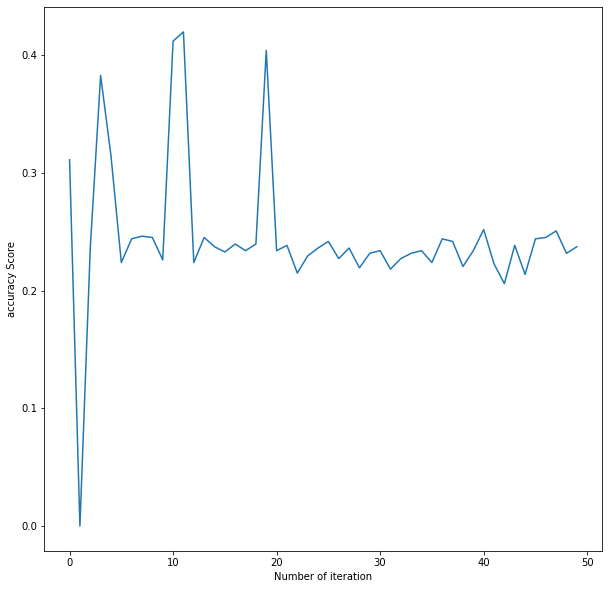

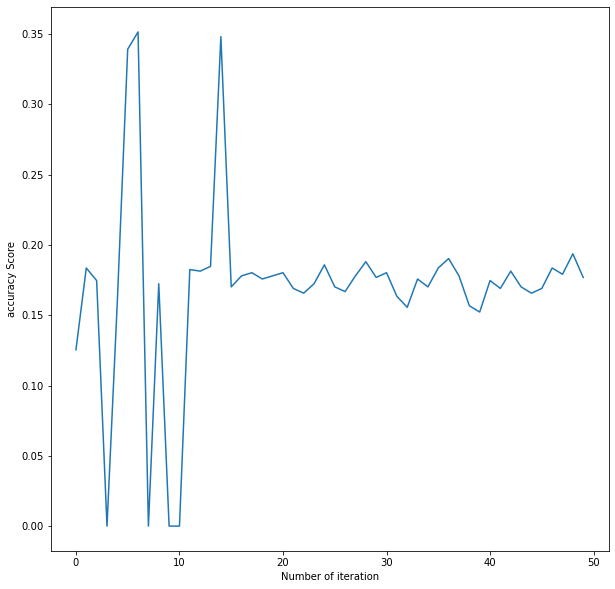

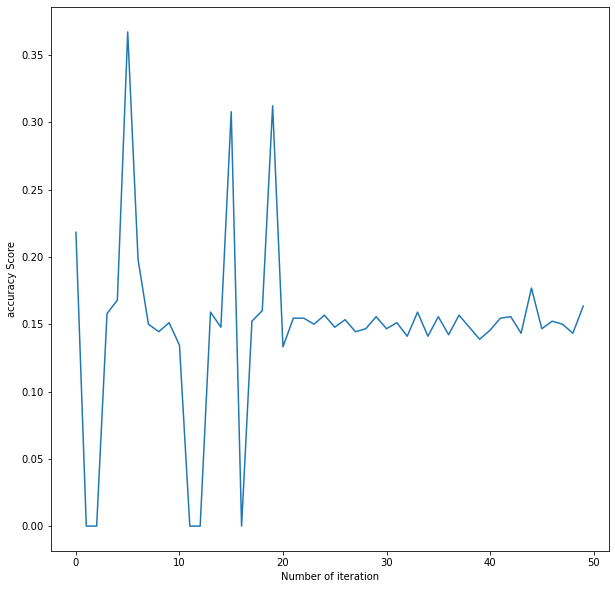

In [8]:
for test1,train1,unlabeled1 in zip(test_data1,train_data1,unlabeled_data1): #everything is in order train,test,unlabeled 
    iterations1,test_acc1 = active_learning(train1,test1,unlabeled1) # zip chesina data ni active learning function ki pampinam 
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    ax1.plot(range(iterations1), test_acc1)
    ax1.set_ylabel('accuracy Score')
    ax1.set_xlabel('Number of iteration')